# Exploring a thermalisation-based training method for Restricted Boltzmann Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def prob_to_binary(probs):
    return np.random.binomial(1,probs)

# Trying for a specifically probability-based implementation

In [2]:
class RBMProb:
    """A probability-based implementation of a Restricted Boltzmann Machine."""
    def __init__(self, num_v = 4, num_h = 4, mixing_param = 0.1):
       
        #internal parameters
        self.num_v = num_v
        self.num_h = num_h
        
        #initial biases/couplings are random
        self.b_v = np.random.uniform(size = (num_v,))
        self.b_h = np.random.uniform(size = (num_h,)) 
        self.w = np.random.uniform(size = (num_v,num_h))
        
        #initial state of visible and hidden units is random
        self.visible_probs = np.random.uniform(size = (num_v,))
        self.hidden_probs = np.random.uniform(size = (num_h,))            
        
        #mixing parameter
        self.mixing_param = mixing_param

    def __str__(self):
        stateString = 'vis_probs: \n' + str(self.visible_probs) + '\n' + 'hid_probs: \n'+ str(self.hidden_probs) + '\n' 
        return stateString
                
    def evolve(self, num_steps, print_states = True):
        #internal evolution of RBM
        
        m = self.mixing_param
        
        if print_states:
            print 'Initial state: '
            print self
        
        for ctr in range(0,num_steps):
            #perform update
            self.hidden_probs = m*self.visible_probs + (1-m)*self.hidden_probs
            self.visible_probs = m*self.hidden_probs + (1-m)*self.visible_probs

        if print_states:        
            print '\nFinal state: '
            print self

    def interact_with_bath(self, bath):
        
        m = self.mixing_param
        
        if bath.rep == 'probability':
            self.visible_probs = bath.probs
        elif bath.rep == 'binary':
            self.visible_probs = m*bath.state + (1-m)*self.visible_probs

In [3]:
class Bath:
    def __init__(self, num_v = 4, representation = 'probability'):
        
        self.num_v = num_v
        self.rep = representation
        #for the moment, take fixed bath state
        self.probs = np.zeros((num_v,))
        if self.rep == 'binary':
            self.state = prob_to_binary(self.probs)
            
    def refresh(self,new_vals):
        if self.rep == 'binary':
            self.state = new_vals
        elif self.rep == 'probability':
            self.probs = new_vals

In [38]:
#initialize system and bath parameters
np.random.seed(1)
num_levels = 5
num_v = num_levels
num_h = num_levels
sys = RBMProb(num_v,num_h,mixing_param=0.3)

betas = np.random.uniform(0.0,2.0,num_levels) #arbitrary choice of betas
bath_probs = np.exp(-betas)
bath_probs /= sum(bath_probs)

data_prob = Bath(num_v,representation='probability')
data_binary = Bath(num_v,representation='binary')

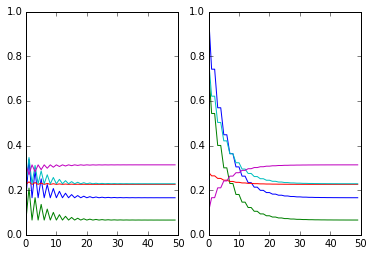

In [39]:
#let sys/bath interact
num_steps = 25

store_visible = []
store_hidden = []
for ctr in range(0,num_steps):

    #update bath (doesn't do anything in this case)
    data_prob.refresh(bath_probs)
    
    #interact with bath
    sys.interact_with_bath(data_prob)
    store_visible.append(list(sys.visible_probs))
    store_hidden.append(list(sys.hidden_probs))
    
    #system self-interaction
    sys.evolve(1,print_states=False)
    store_visible.append(list(sys.visible_probs))
    store_hidden.append(list(sys.hidden_probs))

store_visible = np.array(store_visible)
store_hidden = np.array(store_hidden)
    
ax1=plt.subplot(1,2,1);
plt.plot(store_visible);
plt.subplot(1,2,2,sharey = ax1);
plt.plot(store_hidden);
ax1.set_ylim([0.0,1.0]);

# Now do exact same thing, except bath states are sampled instead of using probability representation

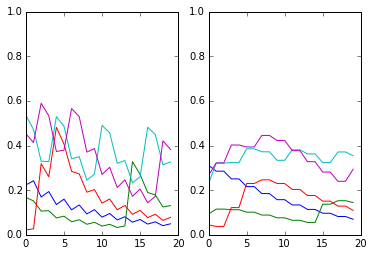

In [44]:
#let sys/bath interact for long time
num_steps = 10

store_visible = []
store_hidden = []
store_bath = []

for ctr in range(0,num_steps):

    #update bath
    data_binary.refresh(prob_to_binary(bath_probs))
    store_bath.append(data_binary.probs)
    
    #interact with bath
    sys.interact_with_bath(data_binary)
    store_visible.append(list(sys.visible_probs))
    store_hidden.append(list(sys.hidden_probs))
    
    #system self-interaction
    sys.evolve(1,print_states=False)
    store_visible.append(list(sys.visible_probs))
    store_hidden.append(list(sys.hidden_probs))

#evolve without bath    
#for ctr in range(0,num_steps):   
#    sys.evolve(1,print_states=False)
#    store_visible.append(list(sys.visible_probs))
#    store_hidden.append(list(sys.hidden_probs))    

store_visible = np.array(store_visible)
store_hidden = np.array(store_hidden)
store_bath = np.array(store_bath)

    
ax1=plt.subplot(1,2,1);
plt.plot(store_visible);
plt.subplot(1,2,2,sharey = ax1);
plt.plot(store_hidden);
ax1.set_ylim([0.0,1.0]);


In [41]:
np.mean(store_visible[1000:-1,:],axis=0) #ignoring "burn-in" period

array([ 0.170071  ,  0.06370303,  0.22383455,  0.22866478,  0.32115846])

In [42]:
np.mean(store_hidden[1000:-1,:],axis=0) #ignoring "burn-in" period

array([ 0.17009873,  0.06368704,  0.22385759,  0.22864943,  0.32115641])

In [43]:
bath_probs

array([ 0.16596754,  0.06604843,  0.22595841,  0.22861253,  0.31341309])

# Leftover junk

class RBM:
    """A Restricted Boltzmann Machine Architecture with fixed biases and couplings."""
    def __init__(self, numV = 5, numH = 4, activation= 'sigmoid', representation = 'probability'):
       
        #internal parameters
        self.numV = numV
        self.numH = numH
        
        #initial biases/couplings are random
        self.bV = np.random.uniform(size = (numV,))
        self.bH = np.random.uniform(size = (numH,)) 
        self.W = np.random.uniform(size = (numV,numH))
        
        #initial state of visible and hidden units is random
        self.visibleProbs = np.random.uniform(size = (numV,))
        self.hiddenProbs = np.random.uniform(size = (numH,))        
        
        #representation of units
        self.rep = representation
        if self.rep == 'probability':
            self.visibleLayer = self.visibleProbs
            self.hiddenLayer = self.hiddenProbs            
        elif self.rep == 'binary':
            self.visibleLayer = probToBinary(self.visibleProbs)
            self.hiddenLayer = probToBinary(self.hiddenProbs)
            
        #activation function
        if activation == 'sigmoid':
            self.activation = lambda x: 1 / (1 + np.exp(-x))
        elif activation == 'linear':
            self.activation = lambda x: x

    def __str__(self):
        stateString = 'visProbs: \n' + str(self.visibleProbs) + '\n' + 'visVals: \n' + str(self.visibleLayer) + '\n' + 'hidProbs: \n'+ str(self.hiddenProbs) + '\n' + 'hidVals: \n' + str(self.hiddenLayer) + '\n'
        return stateString
                
    def evolve(self, numSteps, updateRule = 'useValues', printStates = True):
        #internal evolution of RBM
        
        if printStates:
            print 'Initial state: '
            print self
        
        for step in range(0,numSteps):

            #if update rule uses state values
            if updateRule == 'useValues':
                if self.rep == 'binary':
                    #use values
                    vVals = self.visibleLayer
                    hVals = self.hiddenLayer
                elif self.rep == 'probability':
                    #first sample from probs to get values
                    vVals = probToBinary(self.visibleLayer)
                    hVals = probToBinary(self.hiddenLayer)

            #if update rule uses probabilities
            elif updateRule == 'useProbs':
                hVals = self.hiddenProbs
                vVals = self.visibleProbs
                
            #perform update
            updateVisible = self.W.dot(hVals) + self.bV
            updateHidden = self.W.T.dot(vVals) + self.bH
            self.visibleProbs = self.activation(updateVisible)
            self.hiddenProbs = self.activation(updateHidden) 
            
            if self.rep == 'probability':
                #store probability
                self.visibleLayer = self.visibleProbs
                self.hiddenLayer = self.hiddenProbs
            elif self.rep == 'binary':
                #choose 0 or 1 based on probability
                self.visibleLayer = probToBinary(self.visibleProbs)
                self.hiddenLayer = probToBinary(self.hiddenProbs) 
                
        if printStates:        
            print '\nFinal state: '
            print self

    def interactWithBath(self, bath):
        self.visibleProbs = bath.probs
        self.visibleLayer = bath.state
    

#initialize system and bath
np.random.seed(1)
numV = 5
numH = 4
sys = RBM(numV,numH,representation='binary')
data = bath(numV,representation='binary')

#let sys/bath interact for long time
numSteps = 5

storeVisible = []
storeHidden = []

sys.visibleProbs = np.zeros((numV,))
sys.hiddenProbs = np.zeros((numH,))
storeVisible.append(sys.visibleProbs)
storeHidden.append(sys.hiddenProbs)


for _ in range(0,numSteps):
    #sys.interactWithBath(data)
    #storeVisible.append(sys.visibleProbs)
    #storeHidden.append(sys.hiddenProbs)
    
    sys.evolve(1,updateRule='useProbs',printStates=False)
    storeVisible.append(sys.visibleProbs)
    storeHidden.append(sys.hiddenProbs) 
    
    sys.evolve(1,updateRule='useProbs',printStates=False)
    storeVisible.append(sys.visibleProbs)
    storeHidden.append(sys.hiddenProbs) 
    

plt.subplot(1,2,1)
plt.plot(storeVisible);
plt.subplot(1,2,2)
plt.plot(storeHidden);